In [1]:
import numpy as np
from numpy.lib.function_base import cov
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

start_period = '2018-05-01'

from init import download_data, plot_line, plot_hist, plot_box

def get_AdjC(df):
    # returns a dataframe with 1 column: adj closes
    df_adj = df["Adj Close"]
    return df_adj

def compute_CCreturns(df, aggregation = "M", name=""):
    df_adj = df["Adj Close"]    # using only adj closes
    df_adj_op = df_adj.groupby(pd.Grouper(freq = aggregation))  # aggregation (default: monthly)
    df_adj = df_adj_op.mean()   # aggregate with avg
    df_returns = np.log(df_adj/df_adj.shift(1)) # calculating CC returns
    df_returns.name = name + " CC Return"
    
    # dropping NA values
    return df_returns.dropna()

all_stocks = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"]
dataframes = download_data(stocks = all_stocks, start_stream = start_period)

ccrs = {}
for s in all_stocks:
    ccrs[s] = compute_CCreturns(dataframes[s])

[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done


In [2]:
def descriptive_stats(df):
    ret = {}
    ret["mean"] = df.mean()
    ret["var"] = df.var()
    ret["std"] = df.std()
    ret["min"] = df.min()
    ret["max"] = df.max()
    ret["skew"] = df.skew()             # simmetry
    # skewness -> measures symmetry of a distribution around its mean
    #             = 0 symmetric (normal distribution)
    #             > 0 longer right tail than normal distribution
    #             < 0 longer left tail than normal distribution
    ret["kurt"] = df.kurtosis()     # thickness
    # kurtosis -> measures tail thickness of distribution
    #             > 0 tail fatter than normal distribution tail
    #             < 0 tail thinner than normal distribution tail
    #             = 0 tail as normal distribution tail
    ret["0.25"] = df.describe()[4]
    ret["0.50"] = df.describe()[5]  # median value
    ret["0.75"] = df.describe()[6]

    return ret


for s in all_stocks:
    tmp = descriptive_stats(compute_CCreturns(dataframes[s]))
    counter = 1
    print(str(s) + ' CC return stats')
    for t in tmp:
        print(str(counter) + ' & ' + str(t) + ' & ', end='')
        print('%.5f' % tmp[t], end='')
        print(' \\\\')
        counter += 1
    print()

AAPL CC return stats
1 & mean & 0.03354 \\
2 & var & 0.00793 \\
3 & std & 0.08902 \\
4 & min & -0.17011 \\
5 & max & 0.20639 \\
6 & skew & -0.70223 \\
7 & kurt & 0.45906 \\
8 & 0.25 & -0.00155 \\
9 & 0.50 & 0.04684 \\
10 & 0.75 & 0.10268 \\

NVDA CC return stats
1 & mean & 0.02630 \\
2 & var & 0.01335 \\
3 & std & 0.11553 \\
4 & min & -0.28104 \\
5 & max & 0.16703 \\
6 & skew & -1.25964 \\
7 & kurt & 0.93162 \\
8 & 0.25 & -0.03471 \\
9 & 0.50 & 0.06497 \\
10 & 0.75 & 0.10314 \\

KO CC return stats
1 & mean & 0.00879 \\
2 & var & 0.00239 \\
3 & std & 0.04891 \\
4 & min & -0.20274 \\
5 & max & 0.06923 \\
6 & skew & -3.10252 \\
7 & kurt & 13.05031 \\
8 & 0.25 & -0.01006 \\
9 & 0.50 & 0.02174 \\
10 & 0.75 & 0.03609 \\

UL CC return stats
1 & mean & 0.00611 \\
2 & var & 0.00167 \\
3 & std & 0.04087 \\
4 & min & -0.13845 \\
5 & max & 0.08613 \\
6 & skew & -1.37592 \\
7 & kurt & 5.00158 \\
8 & 0.25 & -0.01673 \\
9 & 0.50 & 0.01223 \\
10 & 0.75 & 0.02718 \\

BAC CC return stats
1 & mean & -0.0


AAPL


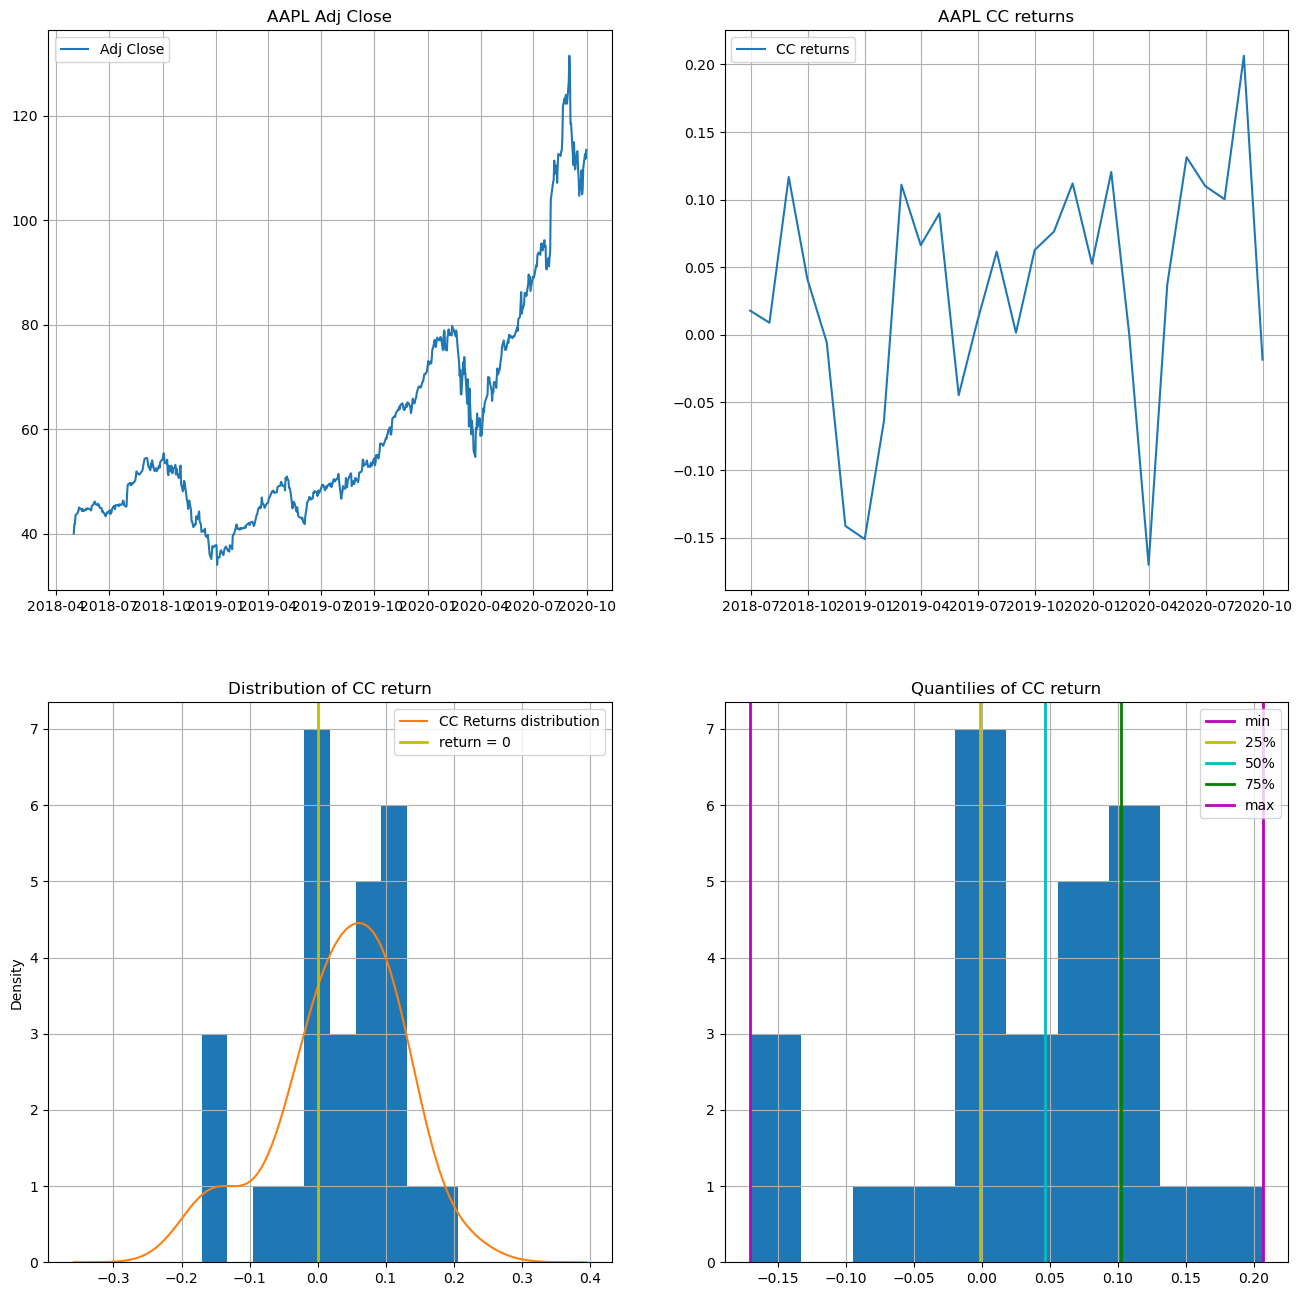

{'mean': 0.033543009797755624,
 'var': 0.007925148983964595,
 'std': 0.08902330584720271,
 'min': -0.1701140823990807,
 'max': 0.20639095382902836,
 'skew': -0.7022313600605425,
 'kurt': 0.4590560233460108,
 '0.25': -0.001545211969152679,
 '0.50': 0.046843452571424485,
 '0.75': 0.10267631402335074}

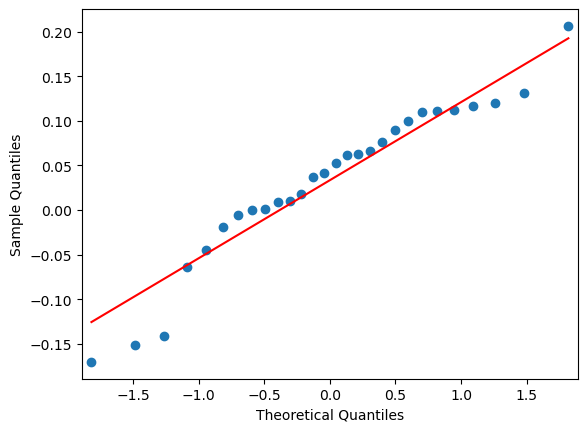

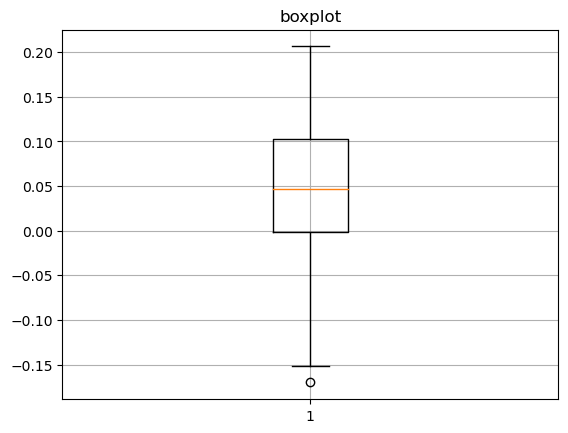


NVDA


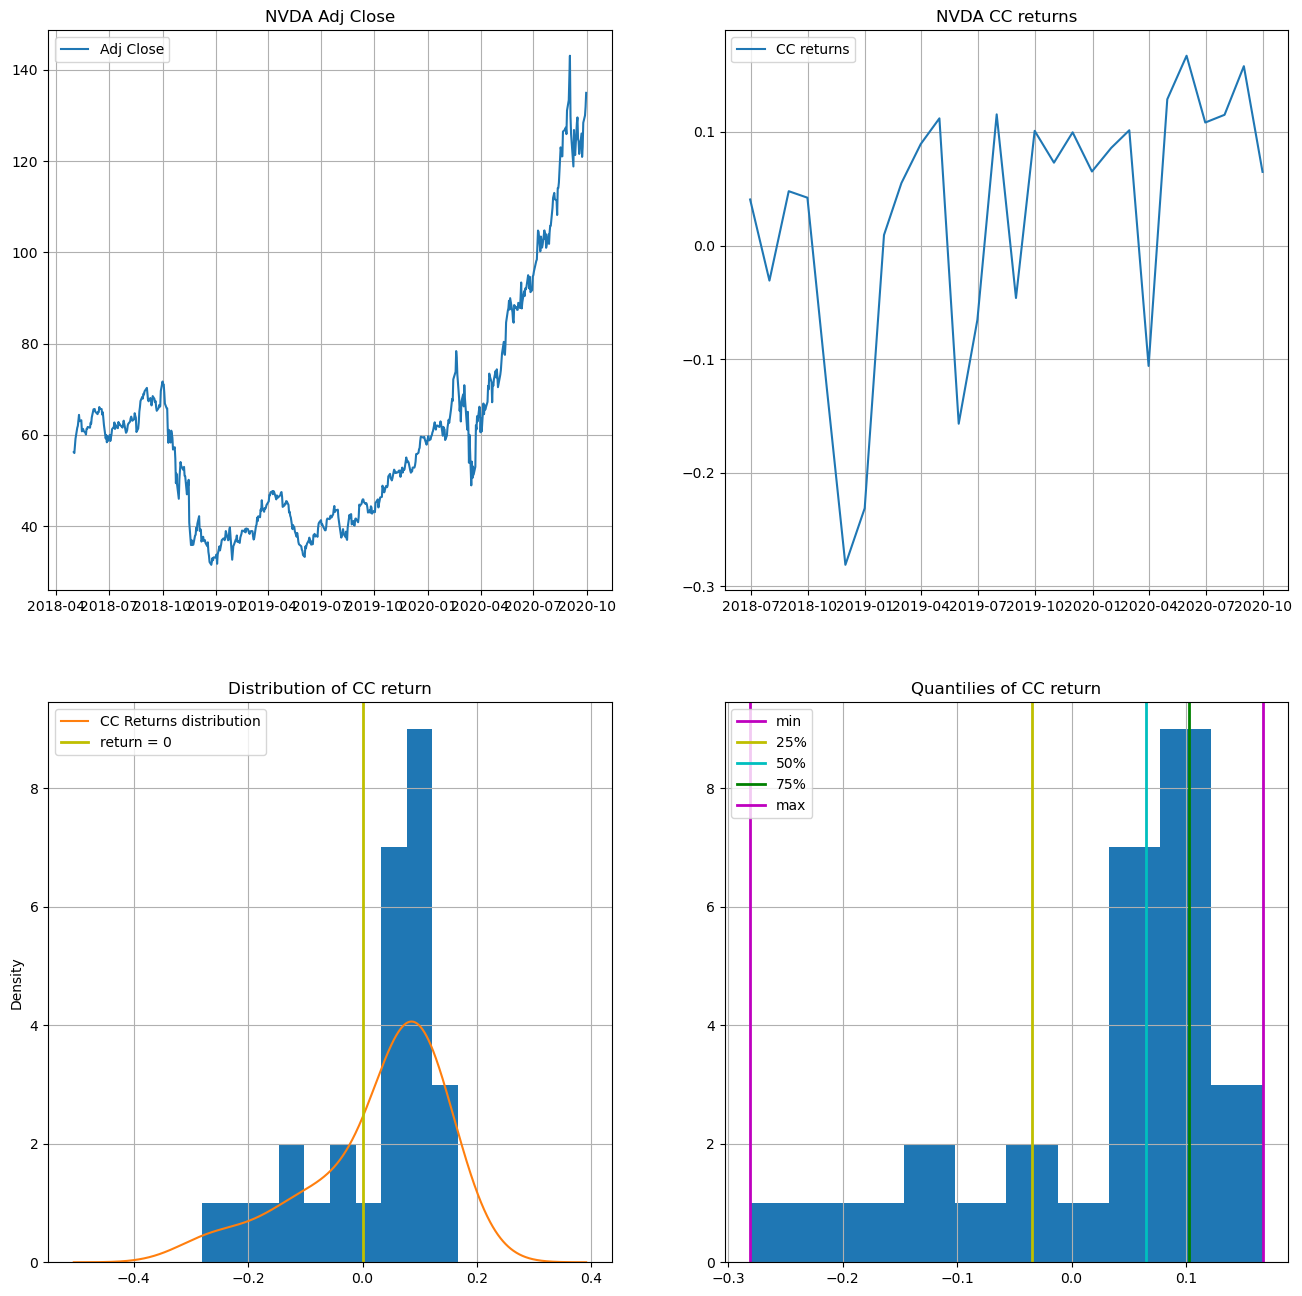

{'mean': 0.026303385117102413,
 'var': 0.013346774474504107,
 'std': 0.11552824102575139,
 'min': -0.2810410540653685,
 'max': 0.1670320913894244,
 'skew': -1.2596415625422466,
 'kurt': 0.9316179154821524,
 '0.25': -0.0347127108821036,
 '0.50': 0.064968027276103,
 '0.75': 0.10313807391773226}

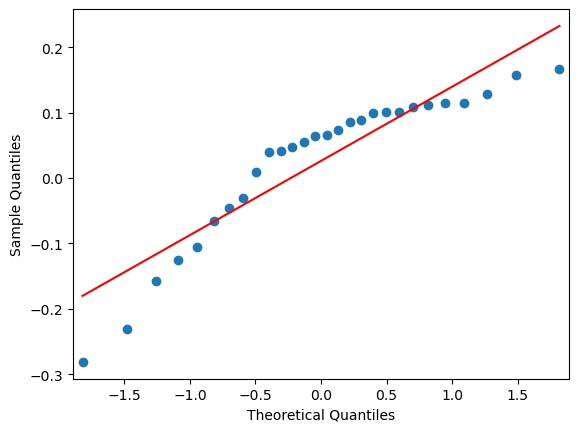

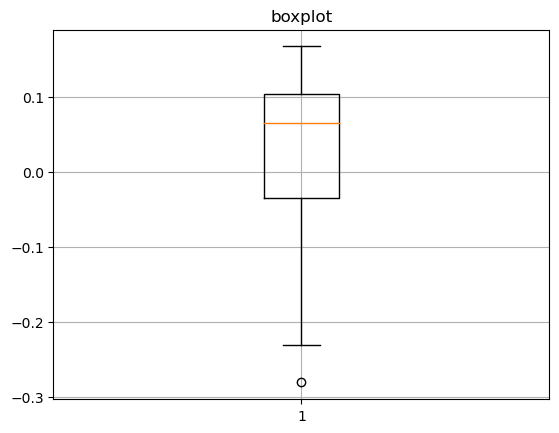


KO


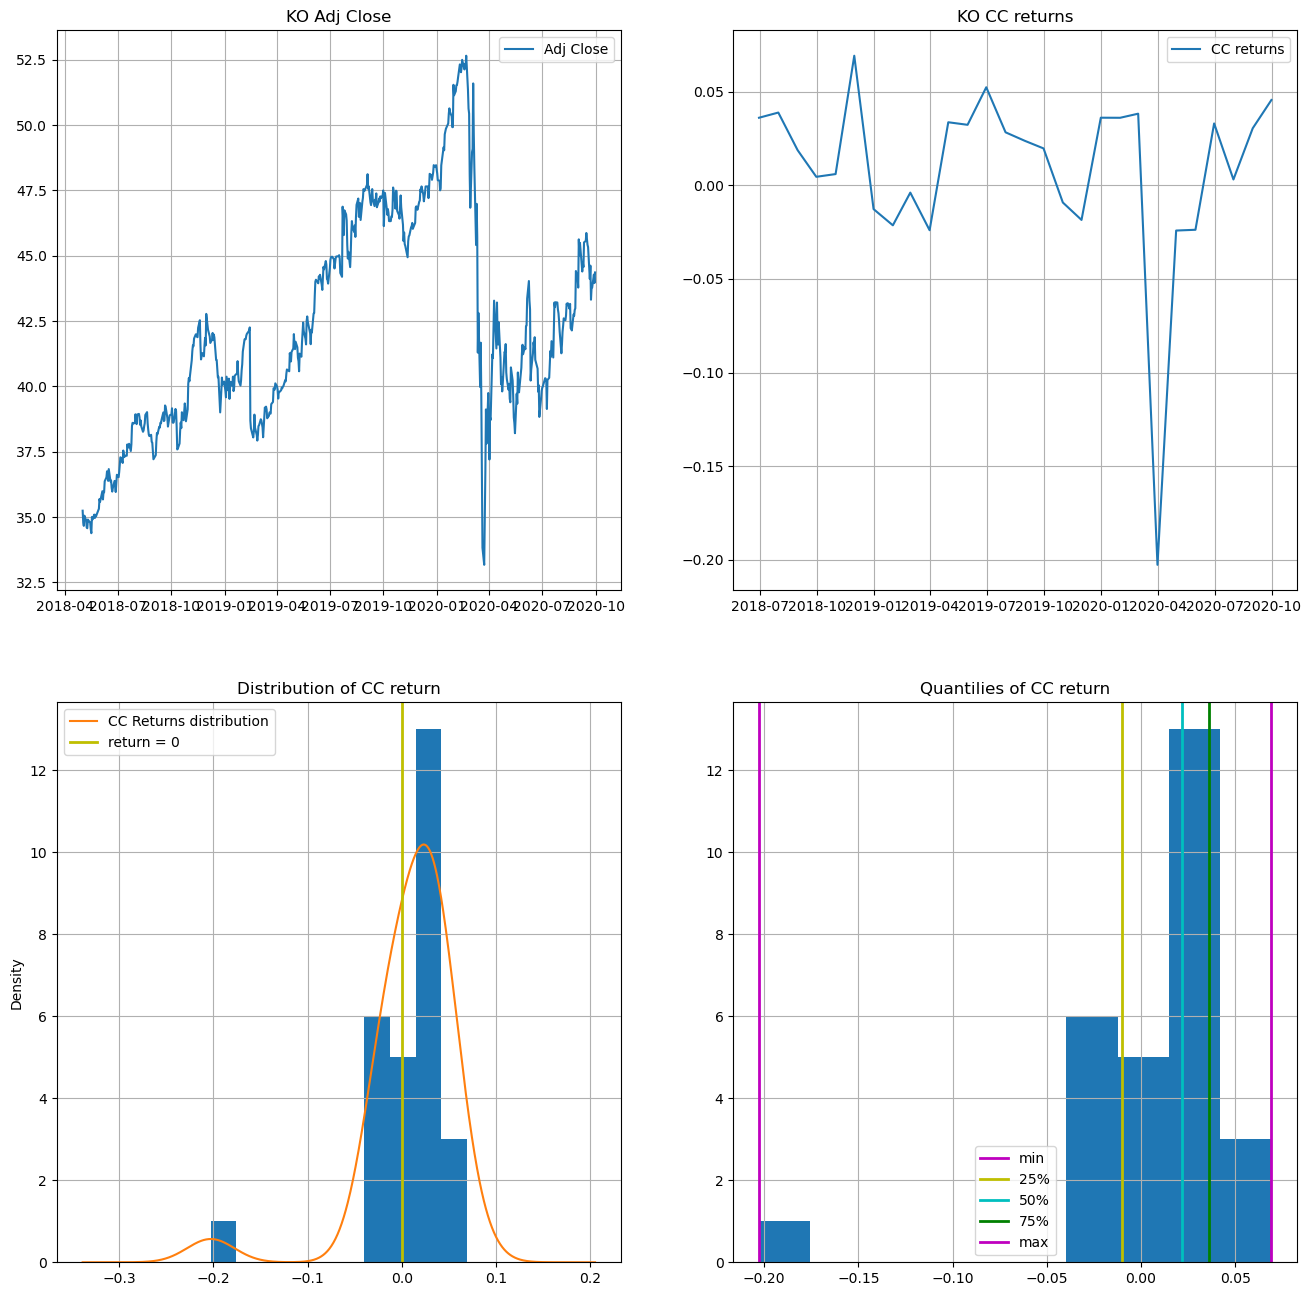

{'mean': 0.008793644771608098,
 'var': 0.0023925101049785285,
 'std': 0.048913291700503334,
 'min': -0.20273642909102463,
 'max': 0.06923058983374643,
 'skew': -3.102518408943804,
 'kurt': 13.050305956693677,
 '0.25': -0.010059919104952164,
 '0.50': 0.02174194493778628,
 '0.75': 0.03608571530349781}

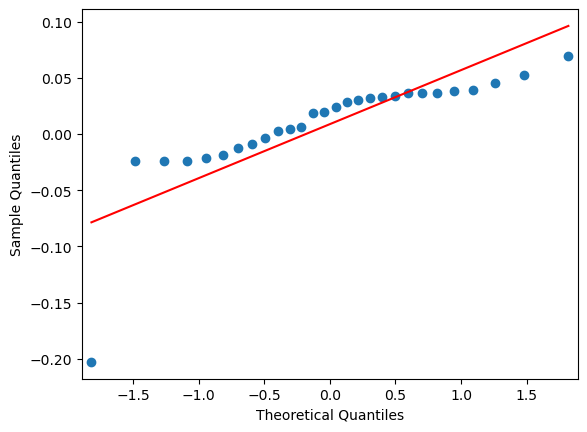

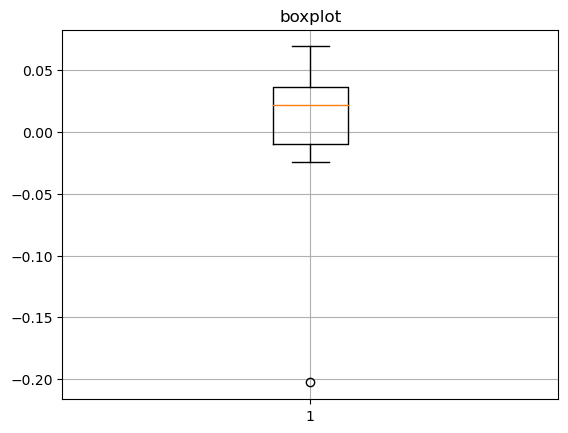


UL


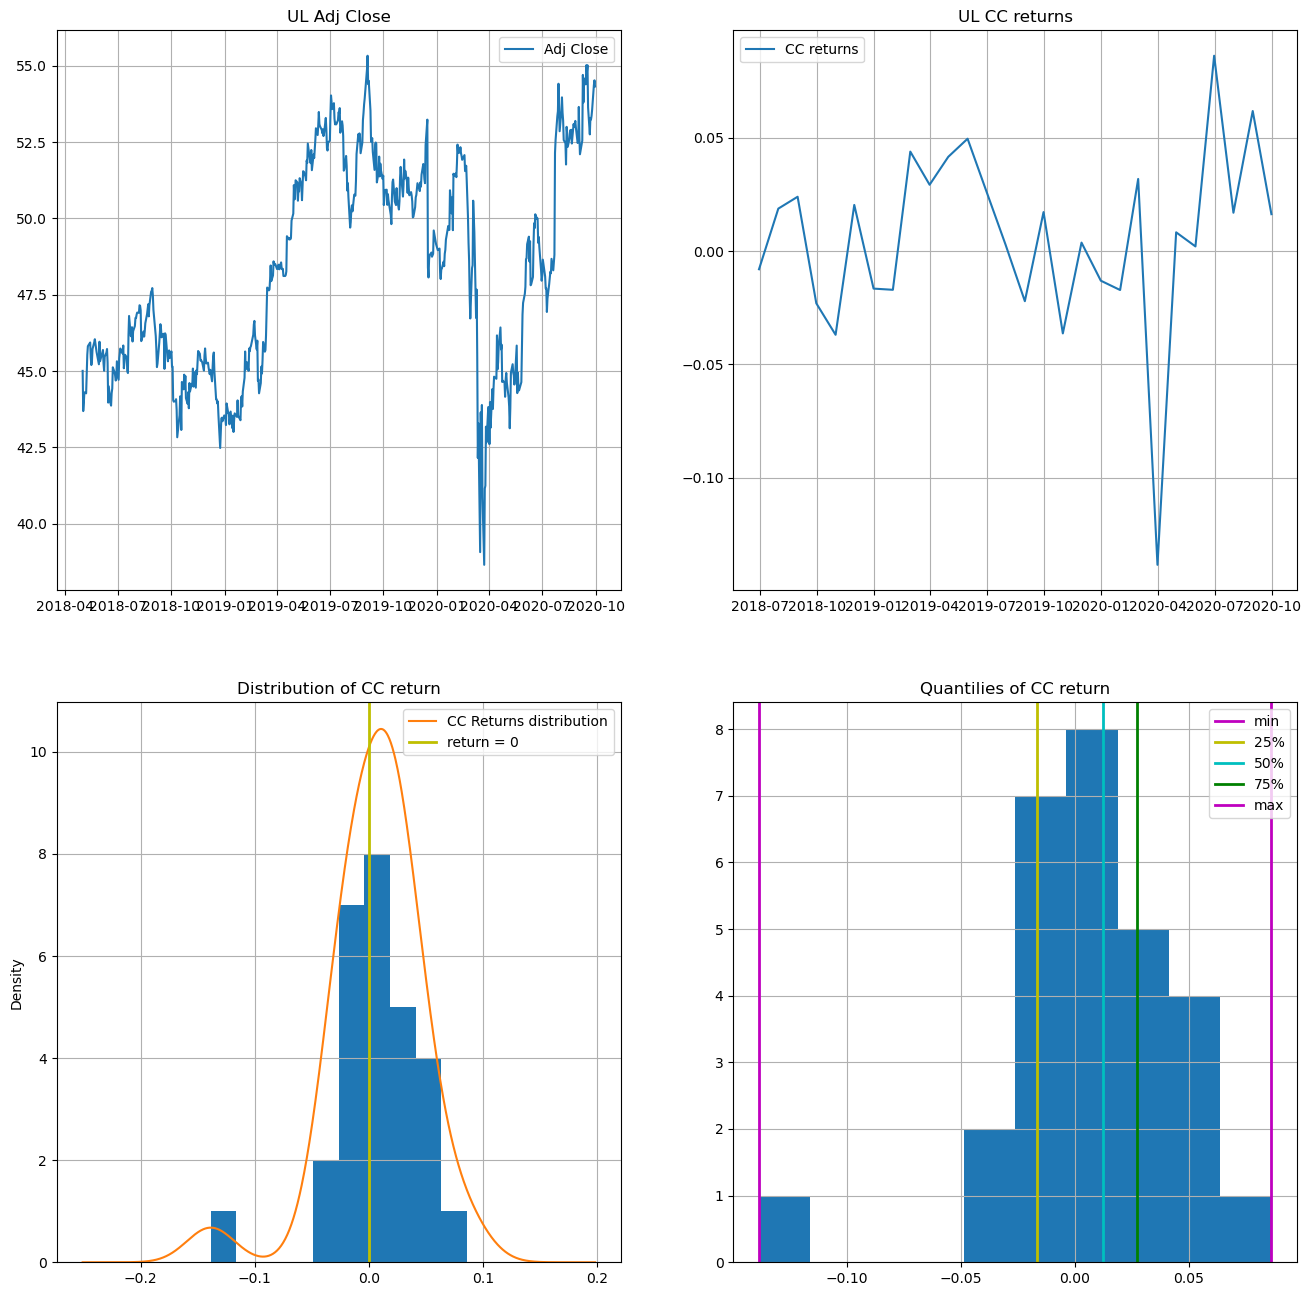

{'mean': 0.006106357211808334,
 'var': 0.001670466316630601,
 'std': 0.04087133857155404,
 'min': -0.13844857330239851,
 'max': 0.08612582958977068,
 'skew': -1.375922523681955,
 'kurt': 5.001575941781083,
 '0.25': -0.016732105981538598,
 '0.50': 0.01223293081976426,
 '0.75': 0.02717622676780705}

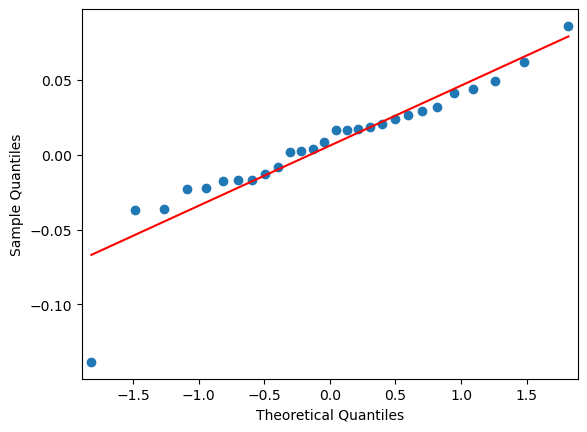

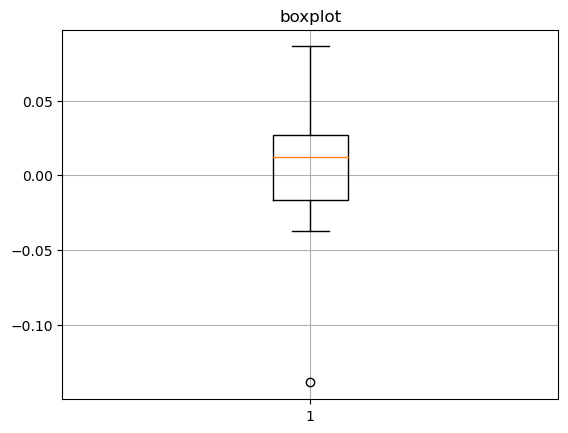


BAC


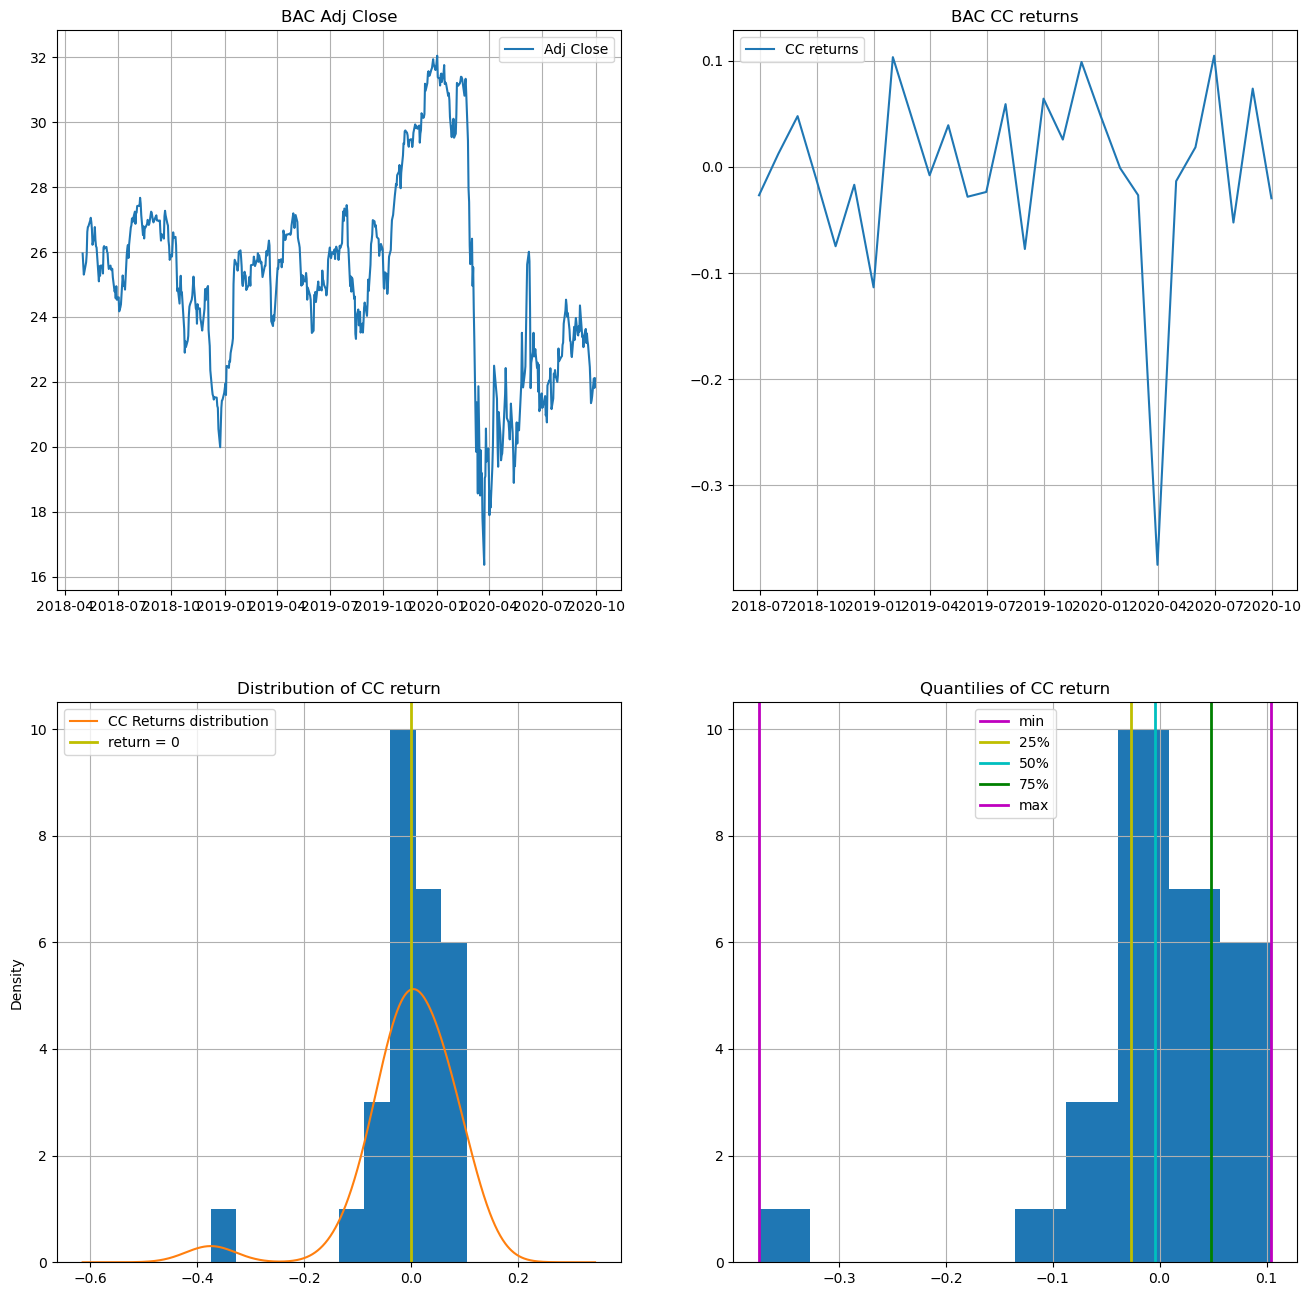

{'mean': -0.004855449372497094,
 'var': 0.008352398653222624,
 'std': 0.0913914583165332,
 'min': -0.3748182819151306,
 'max': 0.1045273598742633,
 'skew': -2.4805422009954534,
 'kurt': 9.523552408971362,
 '0.25': -0.027199787715200603,
 '0.50': -0.004647345270916337,
 '0.75': 0.04843486231233108}

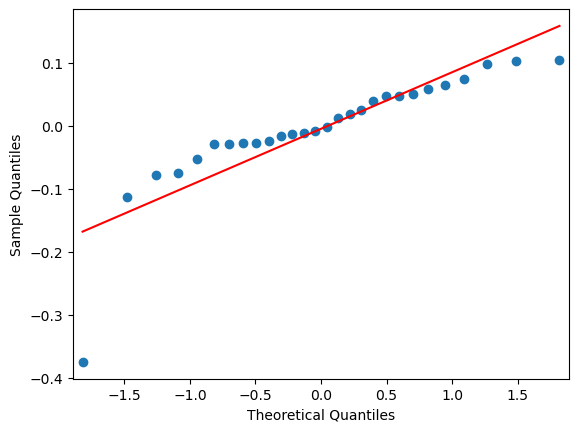

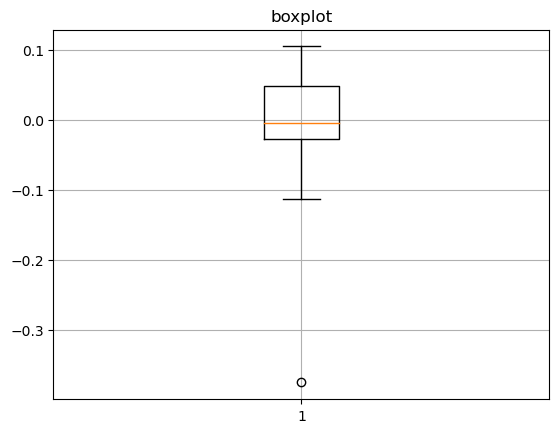


AXP


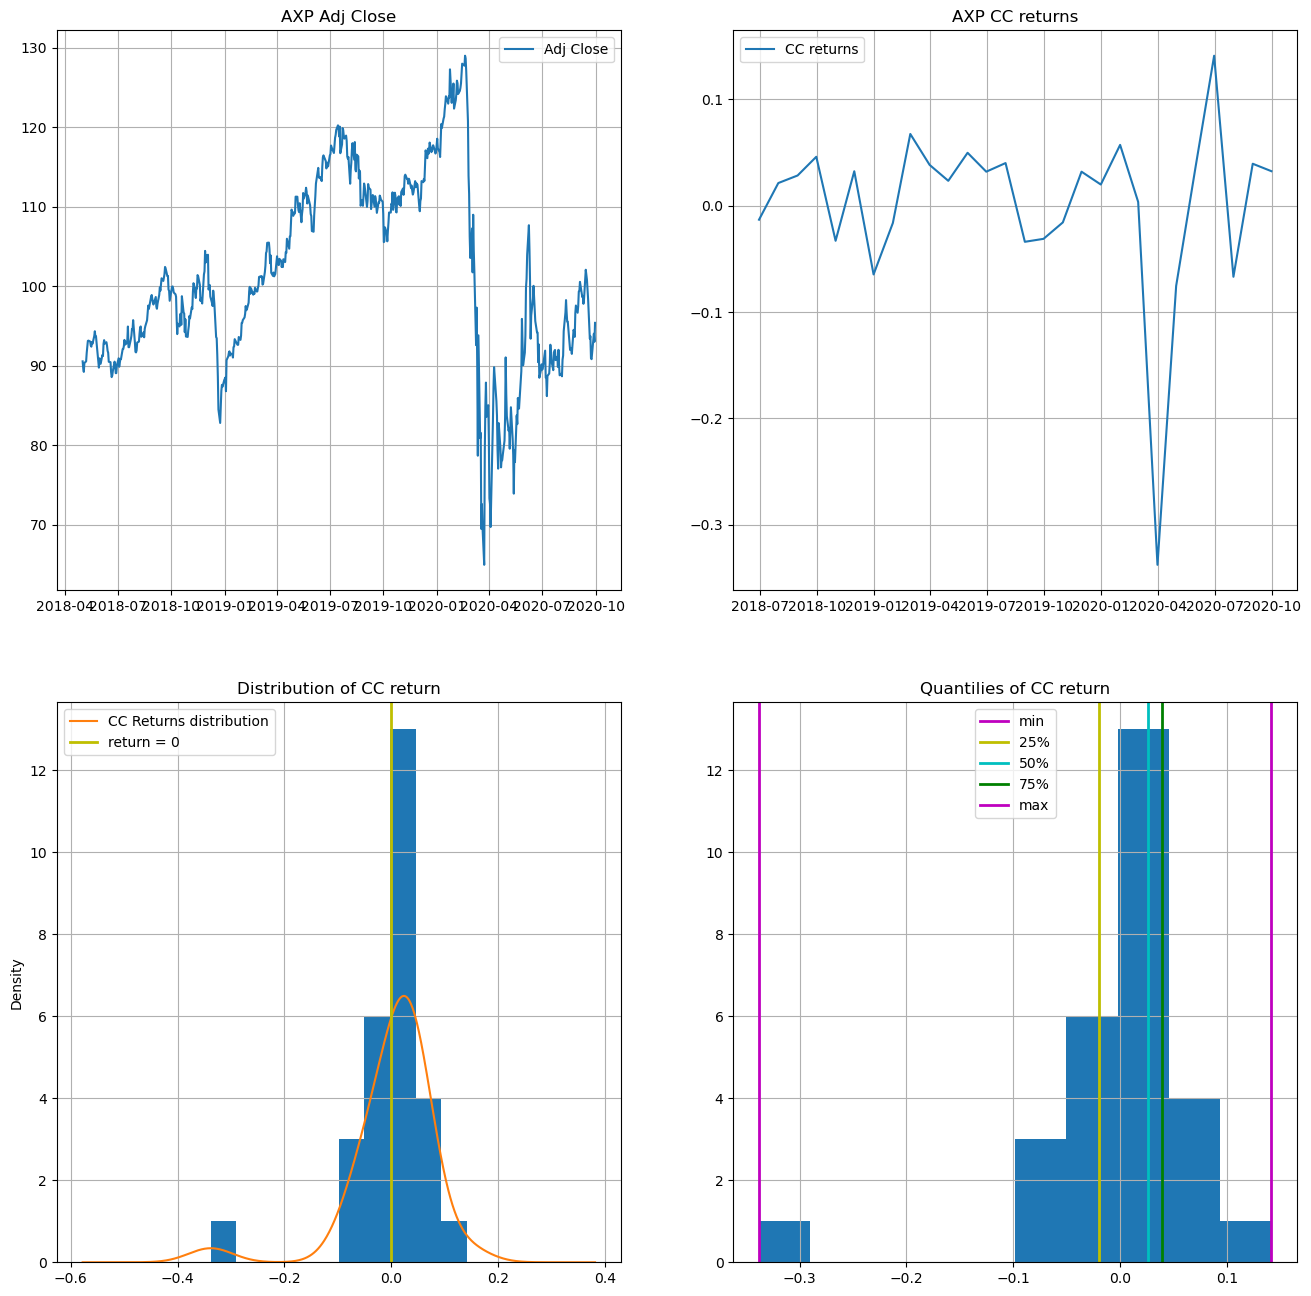

{'mean': 0.0018749984751364587,
 'var': 0.006552405585571406,
 'std': 0.08094693067418558,
 'min': -0.33785323606657913,
 'max': 0.1410768098361826,
 'skew': -2.7626256309461033,
 'kurt': 11.536093186686017,
 '0.25': -0.01998308672098663,
 '0.50': 0.025911940772532838,
 '0.75': 0.03867081794141358}

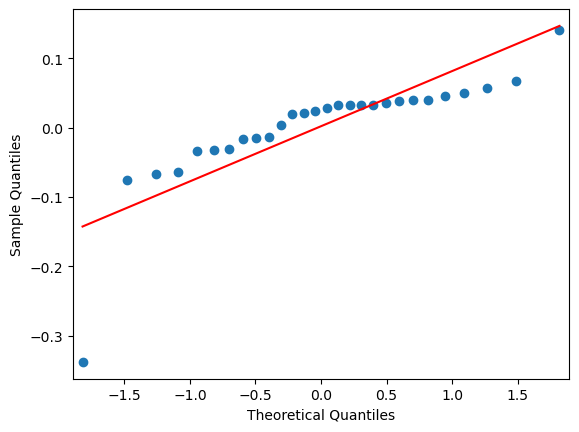

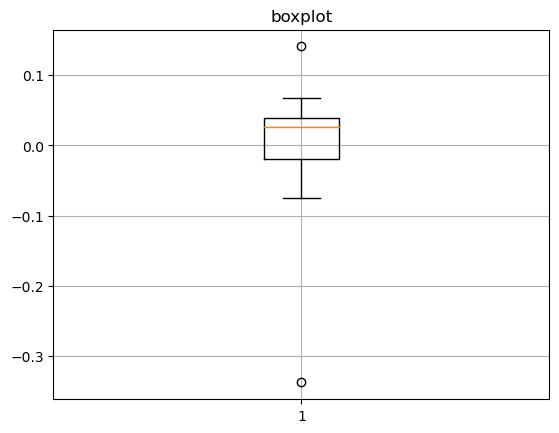

In [3]:
# Statistical analysis and visualization of stock data including Adj Close, CC returns, distribution, quantiles, QQ plot, and boxplot
import statsmodels.api as sm

counter = 0
for s in all_stocks:
    plt.figure(figsize = (16, 16))
    print('\n' + s)
    
    # Plot Adj Close data
    plt.subplot(221)
    plt.title(s + ' Adj Close')
    plt.plot(get_AdjC(dataframes[s]), label = 'Adj Close')
    plt.grid()
    plt.legend()

    # Plot CC returns
    plt.subplot(222)
    plt.title(s + ' CC returns')
    plt.plot(ccrs[s], label = 'CC returns')
    plt.grid()
    plt.legend()

    # Plot histogram and density of CC returns
    plt.subplot(223)
    plt.hist(ccrs[s])
    ccrs[s].plot.density(label = "CC Returns distribution")
    plt.axvline(x=0, linewidth=2, color='y', label = "return = 0")
    plt.legend()
    plt.title('Distribution of CC return')
    plt.grid()

    # Plot quantiles of CC returns
    plt.subplot(224)
    stat = descriptive_stats(ccrs[s])
    plt.hist(ccrs[s])
    plt.axvline(x=stat["min"], linewidth=2, color='m', label = "min")
    plt.axvline(x=stat["0.25"], linewidth=2, color='y', label = "25%")
    plt.axvline(x=stat["0.50"], linewidth=2, color='c', label = "50%")
    plt.axvline(x=stat["0.75"], linewidth=2, color='g', label = "75%")
    plt.axvline(x=stat["max"], linewidth=2, color='m', label = "max")
    plt.legend()
    plt.title('Quantilies of CC return')
    plt.grid()
    # plt.savefig('img1820/'+ str(counter+1) + '-all ' + s + '.png', dpi=300)
    plt.show()

    display(stat)

    # Generate QQ plot
    sm.qqplot(ccrs[s], line = 's')
    # plt.savefig('img1820/'+ str(counter+2) + '-qqplot ' + s + '.png', dpi=300)
    plt.show()

    # Generate boxplot
    plt.figure()
    plt.boxplot(ccrs[s])
    plt.title("boxplot")
    plt.grid()
    # plt.savefig('img1820/'+ str(counter+3) + '-boxplot ' + s + '.png', dpi=300)
    plt.show()
    
    counter += 3